In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

,doi,polymer(s),is_solvent_blend,solvent(s),solvent_components,solution_concentration,solution_concentration_unit,needle_type,needle_diameter_g,collector_type,rotation_speed_rpm,voltage_kv,flow_rate_ml/h,tip_collector_distance_cm,temperature_c,humidity_%,was_formation_stable,fiber_diameter_nm,fiber_diameter_variation_nm,tail_observation
0,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",15.0,wt%,Single Needle,22.0,Flat,NaN,12.0,2.0,6.0,23.0,45,True,1346.0,812.0,True
1,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",12.0,wt%,Single Needle,22.0,Flat,NaN,16.0,2.0,6.0,23.0,45,True,488.0,221.0,False
2,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",15.0,wt%,Single Needle,22.0,Flat,NaN,16.0,2.0,10.0,23.0,45,True,823.0,519.0,False
3,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",9.0,wt%,Single Needle,22.0,Flat,NaN,12.0,2.0,6.0,23.0,45,True,452.0,236.0,False
4,https://doi.org/10.1016/j.jafr.2019.100015,CA,False,ACETONE,"[{""solventName"": ""ACETONE"", ""weight"": null, ""w...",12.0,wt%,Single Needle,22.0,Flat,NaN,12.0,2.0,10.0,23.0,45,True,801.0,382.0,False


In [3]:
df_pvdf = df[(df["polymer(s)"] == "PVDF") & (df["collector_type"] == "Flat") & (df["was_formation_stable"] == True)]

In [4]:
len(df_pvdf)

187

In [5]:
df_pvdf.isna().sum()

doi                              0
polymer(s)                       0
is_solvent_blend                 0
solvent(s)                       0
solvent_components               0
solution_concentration           0
solution_concentration_unit      0
needle_type                      0
needle_diameter_g               88
collector_type                   0
rotation_speed_rpm             187
voltage_kv                       0
flow_rate_ml/h                   0
tip_collector_distance_cm        0
temperature_c                   21
humidity_%                       0
was_formation_stable             0
fiber_diameter_nm                0
fiber_diameter_variation_nm    187
tail_observation                 0
dtype: int64

In [6]:
X_pvdf = df_pvdf[["solution_concentration", "tip_collector_distance_cm", "voltage_kv", "flow_rate_ml/h", 'needle_diameter_g']]
y_pvdf = df_pvdf['fiber_diameter_nm']


In [7]:
print(df_pvdf['needle_diameter_g'].isna().sum())


88


5-Fold Cross-Validation Results for Random Forest Regression on PVDF:
Average RMSE: 263.8687
Average MAE: 107.2267
Average R² Score: 0.4887


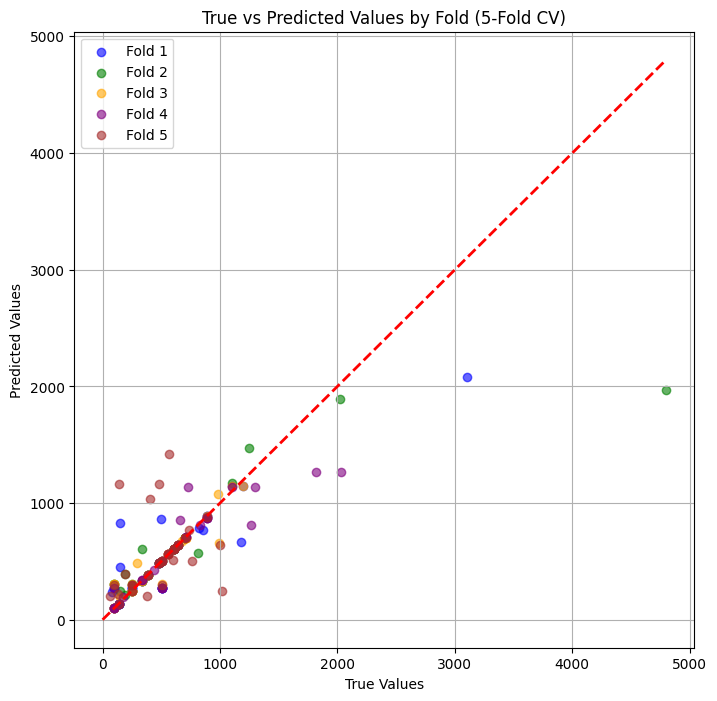

In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []
rmse_list = []
mae_list = []
r2_list = []

colors = ['blue', 'green', 'orange', 'purple', 'brown']

plt.figure(figsize=(8, 8))

for fold, (train_index, val_index) in enumerate(kf.split(X_pvdf), 1):
    X_train_fold, X_val_fold = X_pvdf.iloc[train_index], X_pvdf.iloc[val_index]
    y_train_fold, y_val_fold = y_pvdf.iloc[train_index], y_pvdf.iloc[val_index]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_fold, y_train_fold)

    y_pred = model.predict(X_val_fold)

    mse = mean_squared_error(y_val_fold, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val_fold, y_pred)
    r2 = r2_score(y_val_fold, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

    plt.scatter(y_val_fold, y_pred, alpha=0.6, color=colors[fold-1], label=f'Fold {fold}')

print("5-Fold Cross-Validation Results for Random Forest Regression on PVDF:")
print(f"Average RMSE: {np.mean(rmse_list):.4f}")
print(f"Average MAE: {np.mean(mae_list):.4f}")
print(f"Average R² Score: {np.mean(r2_list):.4f}")

# Plot perfect prediction line
min_val = min(X_pvdf.min().min(), y_pvdf.min())
max_val = max(X_pvdf.max().max(), y_pvdf.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values by Fold (5-Fold CV)')
plt.legend()
plt.grid(True)
plt.show()

5-Fold Cross-Validation Results for CatBoostRegressor Regression on PVDF:
Average RMSE: 231.3818
Average MAE: 96.8956
Average R² Score: 0.6926


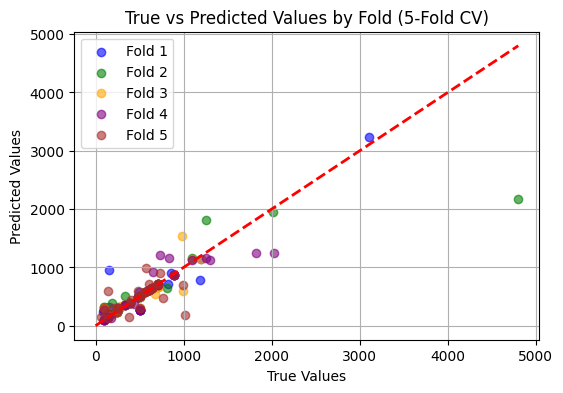

In [9]:
from catboost import CatBoostRegressor

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []
rmse_list = []
mae_list = []
r2_list = []

colors = ['blue', 'green', 'orange', 'purple', 'brown']

plt.figure(figsize=(6, 4))  

for fold, (train_index, val_index) in enumerate(kf.split(X_pvdf), 1):
    X_train_fold, X_val_fold = X_pvdf.iloc[train_index], X_pvdf.iloc[val_index]
    y_train_fold, y_val_fold = y_pvdf.iloc[train_index], y_pvdf.iloc[val_index]


    model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=False
)
    model.fit(X_train_fold, y_train_fold)

    y_pred = model.predict(X_val_fold)

    mse = mean_squared_error(y_val_fold, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val_fold, y_pred)
    r2 = r2_score(y_val_fold, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

    plt.scatter(y_val_fold, y_pred, alpha=0.6, color=colors[fold-1], label=f'Fold {fold}')

print("5-Fold Cross-Validation Results for CatBoostRegressor Regression on PVDF:")
print(f"Average RMSE: {np.mean(rmse_list):.4f}")
print(f"Average MAE: {np.mean(mae_list):.4f}")
print(f"Average R² Score: {np.mean(r2_list):.4f}")

# Plot perfect prediction line
min_val = min(X_pvdf.min().min(), y_pvdf.min())
max_val = max(X_pvdf.max().max(), y_pvdf.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values by Fold (5-Fold CV)')
plt.legend()
plt.grid(True)
plt.show()
